In [1]:
import os
import subprocess
from tqdm.notebook import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import re
from pymatgen.io.lammps.outputs import parse_lammps_log
import numpy as np

from vislib import *

title = {'fontsize':20}
axes = {'fontsize':16}

In [2]:
# Specify directory to search for files
directory_path = "./standard_dimer_scan_outputs/"

# Regular expression for extracting phi and theta from filename
filename_pattern = re.compile(r"_Phi_(\d+)_Theta_(\d+)_")

# Regular expression for extracting energy from file content
energy_pattern = re.compile(r"\s+Total energy in the final basis set =\s+(-?\d+\.\d+)")
rimp2_pattern = re.compile(r"RIMP2\s+total energy =\s+(-?\d+\.\d+) a\.u\.")

energy_total = extract_qchem_energies(directory_path, filename_pattern, energy_pattern)
rimp2_total = extract_qchem_energies(directory_path, filename_pattern, rimp2_pattern)
check_QM_completion(energy_total)
check_QM_completion(rimp2_total)

[0, 5, 10, 15, 20, 25, 30, 40, 50, 60]
0 36
5 36
10 36
15 36
20 36
25 36
30 36
40 36
50 36
60 36
[0, 5, 10, 15, 20, 25, 30, 40, 50, 60]
0 36
5 36
10 36
15 36
20 36
25 36
30 36
40 36
50 36
60 36


In [3]:
# Specify directory to search for files
directory_path = "./hydrogenated_dimer_scan_outputs/"

# Regular expression for extracting phi and theta from filename
filename_pattern = re.compile(r"_Phi_(\d+)_Theta_(\d+)_")

# Regular expression for extracting energy from file content
energy_pattern = re.compile(r"\s+Total energy in the final basis set =\s+(-?\d+\.\d+)")
rimp2_pattern = re.compile(r"RIMP2\s+total energy =\s+(-?\d+\.\d+) a\.u\.")

energy_hyd = extract_qchem_energies(directory_path, filename_pattern, energy_pattern)
rimp2_hyd = extract_qchem_energies(directory_path, filename_pattern, rimp2_pattern)
check_QM_completion(energy_hyd)
check_QM_completion(rimp2_hyd)

[0, 5, 10, 15, 20, 25, 30, 40, 50, 60]
0 36
5 36
10 36
15 36
20 36
25 36
30 36
40 36
50 36
60 36
[0, 5, 10, 15, 20, 25, 30, 40, 50, 60]
0 36
5 36
10 36
15 36
20 36
25 36
30 36
40 36
50 36
60 36


In [4]:
# Specify directory to search for files
directory_path = "./methylated_dimer_scan_outputs//"

# Regular expression for extracting phi and theta from filename
filename_pattern = re.compile(r"_Phi_(\d+)_Theta_(\d+)_")

# Regular expression for extracting energy from file content
energy_pattern = re.compile(r"\s+Total energy in the final basis set =\s+(-?\d+\.\d+)")
rimp2_pattern = re.compile(r"RIMP2\s+total energy =\s+(-?\d+\.\d+) a\.u\.")

energy_meth = extract_qchem_energies(directory_path, filename_pattern, energy_pattern)
rimp2_meth = extract_qchem_energies(directory_path, filename_pattern, rimp2_pattern)
check_QM_completion(energy_meth)
check_QM_completion(rimp2_meth)

[0, 5, 10, 15, 20, 25, 30, 40, 50, 60]
0 36
5 36
10 36
15 36
20 36
25 36
30 36
40 36
50 36
60 36
[0, 5, 10, 15, 20, 25, 30, 40, 50, 60]
0 36
5 36
10 36
15 36
20 36
25 36
30 36
40 36
50 36
60 36


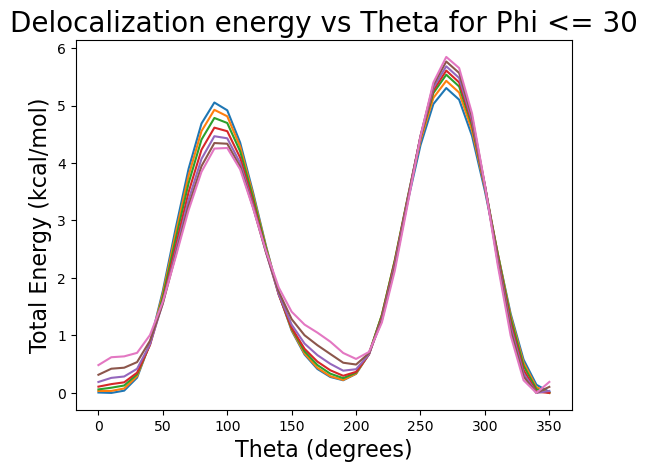

In [5]:
energy_df = calc_deloc_energies(energy_total, energy_hyd, energy_meth)
rimp2_df = calc_deloc_energies(rimp2_total, rimp2_hyd, rimp2_meth)

sorted_deloc = energy_df.sort_values(['Theta', 'Phi'])
for phi in set(sorted_deloc['Phi']):
    if phi <= 30:
        subset = sorted_deloc[sorted_deloc['Phi'] == phi]
        min = np.min(subset['E_deloc'])
        norm = [627.509*(i - min) for i in subset['E_deloc']]
        # plt.plot(subset['theta'], subset['PotEng'])  # Replace 'E_total' with the actual column name for total energy
        plt.plot(subset['Theta'], norm)  # Replace 'E_total' with the actual column name for total energy
        # plt.plot(subset['theta'], subset['E_dihed'], c="red")  # Replace 'E_total' with the actual column name for total energy
        # plt.plot(subset['theta'], subset['E_impro'], c="black")  # Replace 'E_total' with the actual column name for total energy
plt.xlabel('Theta (degrees)', fontdict=axes)
plt.ylabel('Total Energy (kcal/mol)', fontdict=axes)
plt.title(f'Delocalization energy vs Theta for Phi <= 30', fontdict=title)
plt.show()

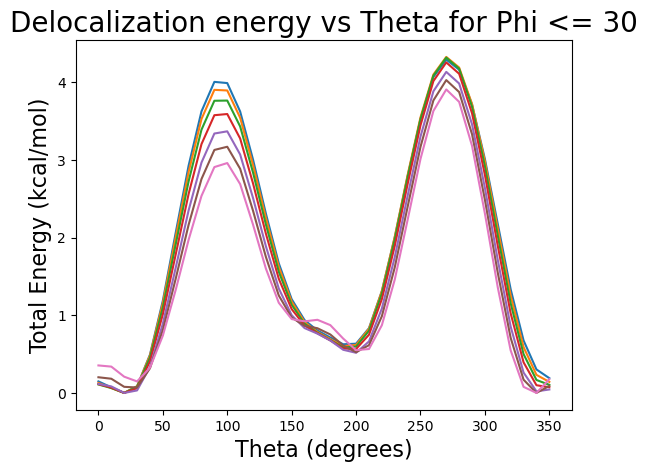

In [11]:
energy_df = calc_deloc_energies(energy_total, energy_hyd, energy_meth)
rimp2_df = calc_deloc_energies(rimp2_total, rimp2_hyd, rimp2_meth)

sorted_deloc = rimp2_df.sort_values(['Theta', 'Phi'])
for phi in set(sorted_deloc['Phi']):
    if phi <= 30:
        subset = sorted_deloc[sorted_deloc['Phi'] == phi]
        min = np.min(subset['E_deloc'])
        norm = [627.509*(i - min) for i in subset['E_deloc']]
        # plt.plot(subset['theta'], subset['PotEng'])  # Replace 'E_total' with the actual column name for total energy
        plt.plot(subset['Theta'], norm)  # Replace 'E_total' with the actual column name for total energy
        # plt.plot(subset['theta'], subset['E_dihed'], c="red")  # Replace 'E_total' with the actual column name for total energy
        # plt.plot(subset['theta'], subset['E_impro'], c="black")  # Replace 'E_total' with the actual column name for total energy
plt.xlabel('Theta (degrees)', fontdict=axes)
plt.ylabel('Total Energy (kcal/mol)', fontdict=axes)
plt.title(f'Delocalization energy vs Theta for Phi <= 30', fontdict=title)
plt.show()

In [7]:
for file in os.listdir('./XYZ_Files/'):
    if "Theta" in file:
        name=file.split('.')[0]
        lammps_file = "UNK_2312FC.lmp"
        output = f"{name}.lmp"
        new_coords = read_xyz(f"./XYZ_Files/{file}")
        update_lammps_data(lammps_file, new_coords, output)

In [8]:
%%time
import os


template_input = '''units           real
atom_style      full
pair_style      lj/cut/coul/cut 10.0 13.4
bond_style      harmonic
angle_style     harmonic
dihedral_style  opls
special_bonds   lj/coul 0 0 0.5
improper_style  cvff
pair_modify mix geometric
dielectric 4.9
read_data       {data_file}
timestep 1.0
thermo 1
thermo_style multi
neighbor 2.0 bin
run_style verlet
run 0
'''

files = os.listdir('./lammps_files_ligpargen/')
lmp_files = [file for file in files if file.endswith(".lmp")]

for file in tqdm(lmp_files):
    if file.endswith(".lmp"):
        name=file.split(".")[0]
        data_file_path = os.path.join('./lammps_files_ligpargen/', file)
        input_file_path = os.path.join('./lammps_files_ligpargen/', f"{name}.lmpin")
        
        # Create an input file for LAMMPS, replacing ${data_file} with the actual file name
        with open(input_file_path, 'w') as f:
            f.write(template_input.format(data_file=data_file_path))

        # Run LAMMPS using subprocess
        # print(f"running {name}")
        # print(" ".join(["/usr/bin/lmp", "-in", input_file_path, "-log", f"{name}.log"]))
        with open(os.devnull, 'w') as fnull:
            subprocess.run(["/usr/bin/lmp", "-in", input_file_path, "-log", f"{name}.log"], stdout=fnull)


  0%|          | 0/360 [00:00<?, ?it/s]

CPU times: user 825 ms, sys: 672 ms, total: 1.5 s
Wall time: 2min 3s


In [14]:
# Regular expression for extracting phi and theta from filename
filename_pattern = re.compile(r"_Phi_(\d+)_Theta_(\d+)_")

# Initialize an empty DataFrame to hold all the data
all_data = pd.DataFrame()


files = os.listdir('./lammps_files_ligpargen/')
log_files = [file for file in files if file.endswith(".log")]

# Loop through log files
for filename in log_files:  # Replace with your log files directory
    match = filename_pattern.search(filename)
    if match:
        phi = int(match.group(1))
        theta = int(match.group(2))
        # Find the section with thermo data
        df = parse_lammps_log(os.path.join('./lammps_files_ligpargen/', filename))[0]
    
        # Add theta and phi columns (Assume you have a way to get these from the filename or file content)
        df['theta'] = theta  # Replace with actual value
        df['phi'] = phi  # Replace with actual value
    
        # Append to the overall DataFrame
        all_data = pd.concat([all_data, df], ignore_index=True)

# Convert to appropriate data types
all_data = all_data.apply(pd.to_numeric, errors='ignore')

# Sort by theta and phi
sorted_data = all_data.sort_values(['theta', 'phi'])

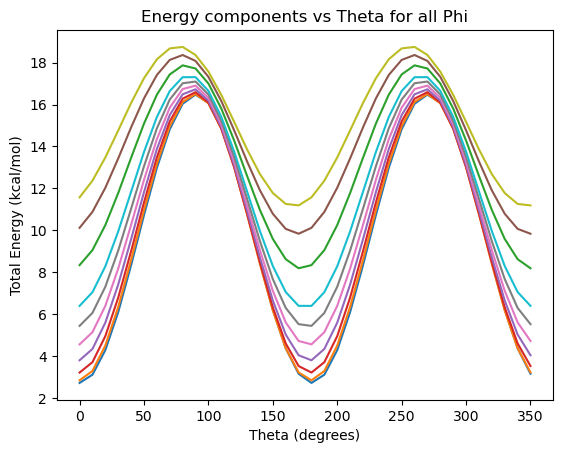

In [15]:
for phi in set(sorted_data['phi']):
    subset = sorted_data[sorted_data['phi'] == phi]
    # plt.plot(subset['theta'], subset['PotEng'])  # Replace 'E_total' with the actual column name for total energy
    plt.plot(subset['theta'], subset['E_dihed'])  # Replace 'E_total' with the actual column name for total energy
    # plt.plot(subset['theta'], subset['E_dihed'], c="red")  # Replace 'E_total' with the actual column name for total energy
    # plt.plot(subset['theta'], subset['E_impro'], c="black")  # Replace 'E_total' with the actual column name for total energy
plt.xlabel('Theta (degrees)')
plt.ylabel('Total Energy (kcal/mol)')
plt.title(f'Energy components vs Theta for all Phi')
plt.show()

In [19]:
def calc_TS_energies(total_dict, mm_dict):
    data = []
    for phi in total_dict:
        for theta in total_dict[phi]:
            if theta >= 30:
                # print(phi,theta)
                E_nonbond = mm_dict[phi][theta]
                E_TS = total_dict[phi][theta]*627.509 - E_nonbond
    
                data.append([phi, theta, E_TS, E_nonbond])

    df = pd.DataFrame(data, columns=['Phi', 'Theta', 'E_TS', 'E_nonbond'])
    return df

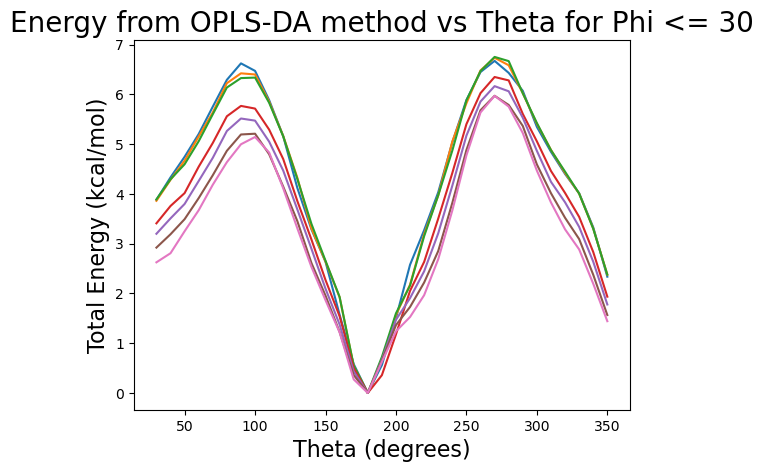

In [21]:
mm_dict = {}
for phi in set(sorted_data['phi']):
    subset = sorted_data[sorted_data['phi'] == phi]
    test = subset.to_dict()
    mm_dict[phi] = {}
    for i in test['phi']:
        theta = test['theta'][i]
        mm_dict[phi][theta] = test['E_vdwl'][i] + test['E_coul'][i] + test['E_long'][i]
        
test = calc_TS_energies(energy_total, mm_dict)
sorted_TS = test.sort_values(['Theta', 'Phi'])
for phi in set(sorted_TS['Phi']):
    if phi <= 30:
        subset = sorted_TS[sorted_TS['Phi'] == phi]
        min = np.min(subset['E_TS'])
        norm = [(i - min) for i in subset['E_TS']]
        # plt.plot(subset['theta'], subset['PotEng'])  # Replace 'E_total' with the actual column name for total energy
        plt.plot(subset['Theta'], norm)  # Replace 'E_total' with the actual column name for total energy
        # plt.plot(subset['theta'], subset['E_dihed'], c="red")  # Replace 'E_total' with the actual column name for total energy
        # plt.plot(subset['theta'], subset['E_impro'], c="black")  # Replace 'E_total' with the actual column name for total energy
plt.xlabel('Theta (degrees)', fontdict=axes)
plt.ylabel('Total Energy (kcal/mol)', fontdict=axes)
plt.title(f'Energy from OPLS-DA method vs Theta for Phi <= 30', fontdict=title)
plt.show()

In [27]:
e_dict = rimp2_total
all_energies = [e_dict[phi][theta] for phi in e_dict for theta in e_dict[phi]]


In [28]:
def plot_energy_dict(e_dict, units="rydberg", name = "RIMP2 energy"):
    """plots full torsional scans for all available improper angles phi
    
    args: 
        e_dict, dictionary of energies with following schema
            {phi0: {theta0: E0, theta1: E1, ...} ...}
            
        units, unit of energy from input e_dict
    """
    all_energies = [e_dict[phi][theta] for phi in e_dict for theta in e_dict[phi]]
    min = np.min(all_energies)
    for phi in e_dict:
        thetas = [theta for theta in e_dict[phi]]
        thetas = sorted(thetas)
        energies = [e_dict[phi][theta] for theta in thetas]
        if units == "rydberg":
            # convert to kcal/mol
            e_norm = [(e - min) * 627.509 for e in energies]
        elif units == "kcal":
            e_norm = [(e - min) for e in energies]
        else:
            raise Exception("Please use a supported energy unit")
        plt.plot(thetas, e_norm)
    plt.xlabel('Theta (degrees)')
    plt.ylabel('Total Energy (kcal/mol)')
    plt.title(f'Total {name} vs Theta for varying Phi')
    plt.show()

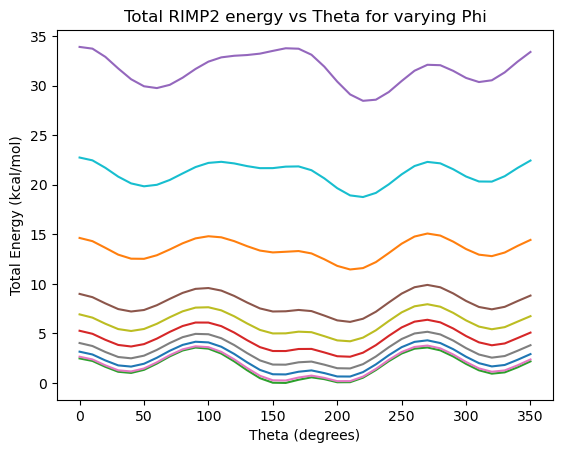

In [29]:
plot_energy_dict(rimp2_total)

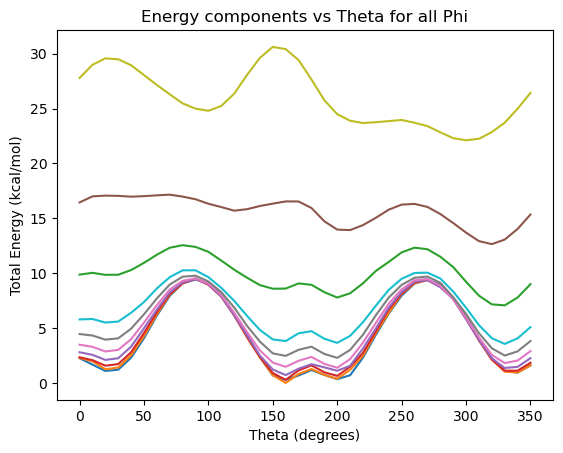

In [34]:
for phi in set(sorted_data['phi']):
    subset = sorted_data[sorted_data['phi'] == phi]
    
    # plt.plot(subset['theta'], subset['PotEng'])  # Replace 'E_total' with the actual column name for total energy
    plt.plot(subset['theta'], subset['PotEng'] - np.min(sorted_data['PotEng']))  # Replace 'E_total' with the actual column name for total energy
    # plt.plot(subset['theta'], subset['E_dihed'], c="red")  # Replace 'E_total' with the actual column name for total energy
    # plt.plot(subset['theta'], subset['E_impro'], c="black")  # Replace 'E_total' with the actual column name for total energy
plt.xlabel('Theta (degrees)')
plt.ylabel('Total Energy (kcal/mol)')
plt.title(f'Energy components vs Theta for all Phi')
plt.show()

Text(0.5, 1.0, 'Energy components vs Theta for all Phi')

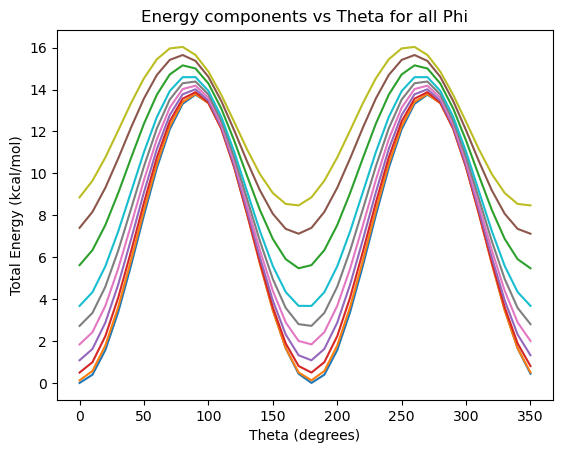

In [35]:
for phi in set(sorted_data['phi']):
    subset = sorted_data[sorted_data['phi'] == phi]
    
    # plt.plot(subset['theta'], subset['PotEng'])  # Replace 'E_total' with the actual column name for total energy
    plt.plot(subset['theta'], subset['E_dihed'] - np.min(sorted_data['E_dihed']))  # Replace 'E_total' with the actual column name for total energy
    # plt.plot(subset['theta'], subset['E_dihed'], c="red")  # Replace 'E_total' with the actual column name for total energy
    # plt.plot(subset['theta'], subset['E_impro'], c="black")  # Replace 'E_total' with the actual column name for total energy
plt.xlabel('Theta (degrees)')
plt.ylabel('Total Energy (kcal/mol)')
plt.title(f'Energy components vs Theta for all Phi')

In [6]:
sorted_deloc.to_csv("sorted_deloc_energies.ptb7fin.csv")